<a href="https://colab.research.google.com/github/SiracencoSerghei/linear_algebra/blob/main/3.1_eigen_decomposition/3.1_9_generalizedEig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from mpl_toolkits.mplot3d import Axes3D
import scipy.linalg # kind of annoying, but numpy doesn't do GED

---
# Generalized eigendecomposition
---

[[3 2]
 [1 3]]
 
[[1 1]
 [4 1]]
 
[-1.10727513+0.j  2.10727513+0.j]
 
[[-0.60332746 -0.11930764]
 [ 0.79749356 -0.99285733]]
 


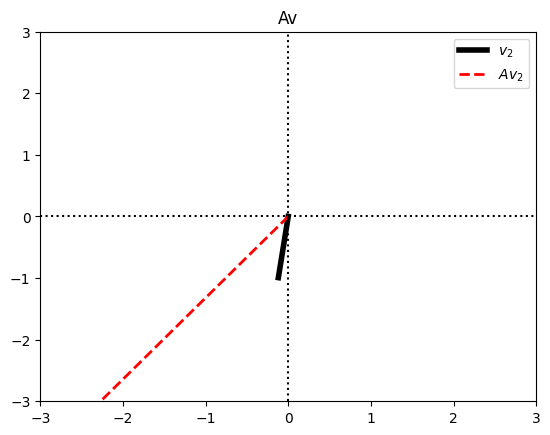

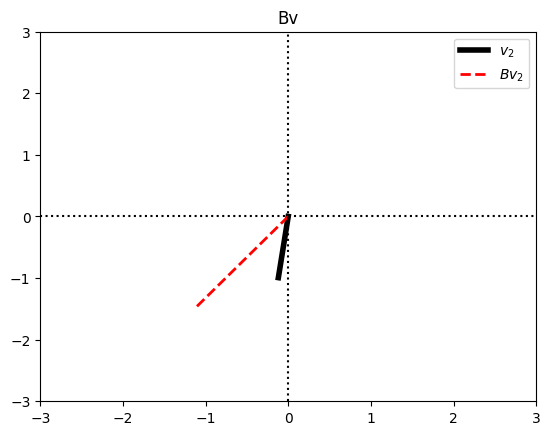

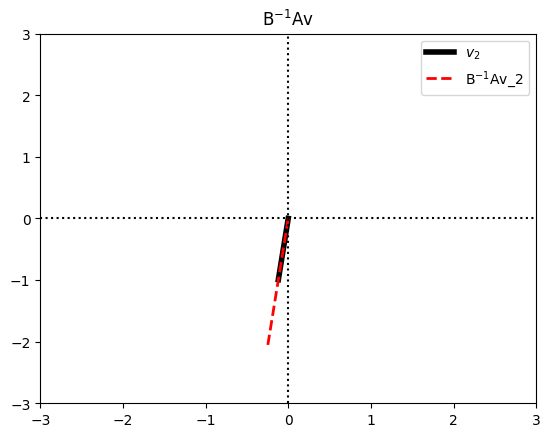

In [6]:

# define matrices
A = np.array([ [3,2], [1,3]])
B = np.array([ [1,1], [4,1]])
print(A), print(' ')
print(B), print(' ')

# GED
eigvals,eigvecs = scipy.linalg.eig(A,B)
print(eigvals), print(' ')
print(eigvecs), print(' ')

# matrix-vector multiplication
Av = A@eigvecs[:,1]
Bv = B@eigvecs[:,1]
BinvAv = np.linalg.inv(B)@A@eigvecs[:,1]


plt.plot([0,eigvecs[0,1]],[0,eigvecs[1,1]],'k',linewidth=4,label='$v_2$')
plt.plot([0,Av[0]],[0,Av[1]],'r--',linewidth=2,label='$Av_2$')
plt.xlim([-3,3]), plt.ylim([-3,3])
plt.plot([-3,3],[0,0],'k:')
plt.plot([0,0],[-3,3],'k:')
plt.legend()
plt.title('Av')
plt.show()

plt.plot([0,eigvecs[0,1]],[0,eigvecs[1,1]],'k',linewidth=4,label='$v_2$')
plt.plot([0,Bv[0]],[0,Bv[1]],'r--',linewidth=2,label='$Bv_2$')
plt.xlim([-3,3]), plt.ylim([-3,3])
plt.plot([-3,3],[0,0],'k:')
plt.plot([0,0],[-3,3],'k:')
plt.legend()
plt.title('Bv')
plt.show()


plt.plot([0,eigvecs[0,1]],[0,eigvecs[1,1]],'k',linewidth=4,label='$v_2$')
plt.plot([0,BinvAv[0]],[0,BinvAv[1]],'r--',linewidth=2,label='B$^{-1}$Av_2')
plt.xlim([-3,3]), plt.ylim([-3,3])
plt.plot([-3,3],[0,0],'k:')
plt.plot([0,0],[-3,3],'k:')
plt.legend()
plt.title('B$^{-1}$Av')
plt.show()


---
# Code Challenge: GED in small and large matricies
---

[ -1.45114534+0.j -12.37021897+0.j]
 
[ -1.45114534+0.j -12.37021897+0.j]
 


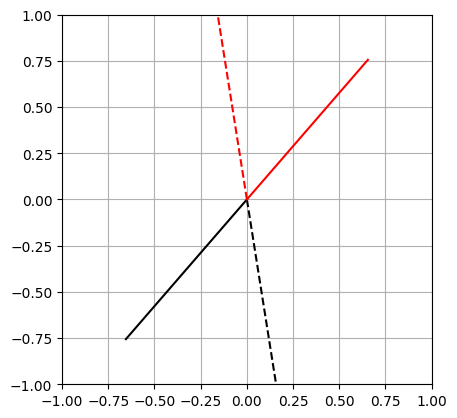

In [17]:
# GOAL: Compare eig(S,R) with eig(inv(R)*S)

# part 1: GED on 2x2 matrices
S = np.random.randn(2,2)
R = np.random.randn(2,2)

Ls,Ws = scipy.linalg.eig(S,R)
Li,Wi = scipy.linalg.eig(np.linalg.inv(R)@S)

print(Ls), print(' ')
print(Li), print(' ')

# plot eigenVectors
plt.plot([0,Ws[0,0]],[0,Ws[1,0]],'k')
plt.plot([0,Ws[0,1]],[0,Ws[1,1]],'k--')
plt.plot([0,Wi[0,0]],[0,Wi[1,0]],'r')
plt.plot([0,Wi[0,1]],[0,Wi[1,1]],'r--')

plt.axis('square')
plt.grid()
plt.axis([-1,1,-1,1])

plt.show()

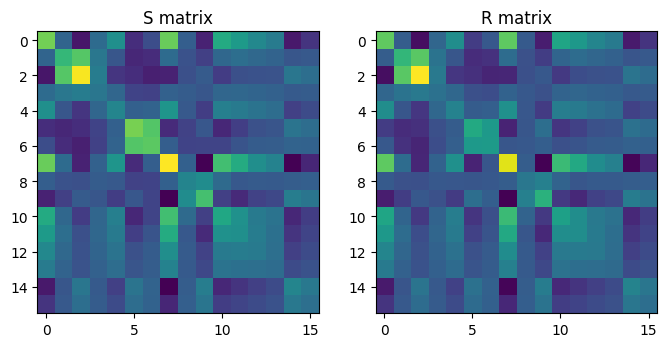

In [22]:
import scipy.io as sio
import io
import requests

# load data
# Correct URL to the raw .mat file on GitHub
data_url = "https://raw.githubusercontent.com/SiracencoSerghei/linear_algebra/main/3.1_eigen_decomposition/real_matrices.mat"

# Download the file using a GET request
response = requests.get(data_url)

# Check if the download was successful
if response.status_code == 200:  # status code 200 indicates the request was successful
    # Convert the response content to a byte stream
    byte_stream = io.BytesIO(response.content)
    # Load the .mat file directly from the byte stream into a Python variable
    data = sio.loadmat(byte_stream)
    # Now you can work with the data stored in the 'data' dictionary
else:
    print("Failed to download the file.")

S = data['S']
R = data['R']

# let's have a look..
fig,ax = plt.subplots(1,2,figsize=(8,5))
ax[0].imshow(S)
ax[0].set_title('S matrix')

ax[1].imshow(R)
ax[1].set_title('R matrix')

plt.show()


In [23]:
print(np.shape(R))
print(np.linalg.matrix_rank(R))

(16, 16)
14


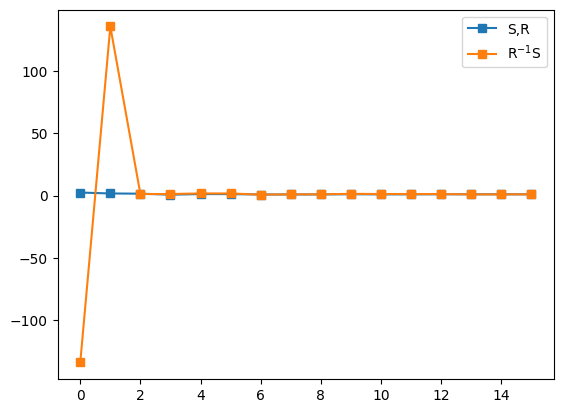

In [32]:
Ls,Ws = scipy.linalg.eig(S,R)
Li,Wi = scipy.linalg.eig(np.linalg.inv(R)@S)

plt.plot(Ls, 's-', label='S,R')
plt.plot(Li, 's-', label='R$^{-1}$S')
plt.legend()
# plt.ylim([-10,10])

plt.show()
